In [3]:
from OCT import OptimalDecisionTrees
from OCT import tree_picture
import numpy as np
from scipy import stats
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
np.set_printoptions(suppress=True)

# Test on Wine data set

In [4]:
data = pd.read_csv("Wine.csv", keep_default_na=False)
# remove outliers
data = data[(np.abs(stats.zscore(data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']])) < 3).all(axis=1)].reset_index(drop=True)
# convert to numpy
x = data.loc[:, data.columns != 'Customer_Segment'].to_numpy()
# test set index
test_ind = np.arange(1,data.shape[0],5)
# split into training and test
x_test = x[test_ind,:]
x_train = x[~np.isin(np.arange(len(x)), test_ind)]
y = data.loc[:, data.columns == 'Customer_Segment'].to_numpy().reshape((data.shape[0], ))
y_test = y[test_ind]
y_train = y[~np.isin(np.arange(len(y)), test_ind)]

In [5]:
# crete instance
OCT = OptimalDecisionTrees(max_depth=2, min_leaf_samples=1, alpha=6)
# fit training data set
OCT.fit(x_train,y_train)
# make a prediction on test
y_test_pred = OCT.predict(x_test)
# make a prediction on training
y_train_pred = OCT.predict(x_train)
print('Accuracy for training data: ', accuracy_score(y_train, y_train_pred))
print('Accuracy for test data: ', accuracy_score(y_test, y_test_pred))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-19
Set parameter TimeLimit to value 1800
Set parameter MIPGap to value 0.03
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2072 rows, 1023 columns and 24710 nonzeros
Model fingerprint: 0x372e9411
Variable types: 23 continuous, 1000 integer (996 binary)
Coefficient statistics:
  Matrix range     [9e-02, 1e+02]
  Objective range  [5e-01, 6e+00]
  Bounds range     [1e+00, 1e+02]
  RHS range        [1e+00, 1e+02]
Presolve removed 276 rows and 406 columns
Presolve time: 0.07s
Presolved: 1796 rows, 617 columns, 18688 nonzeros
Variable types: 3 continuous, 614 integer (594 binary)
Found heuristic solution: objective 47.5000000

Root relaxation: objective 2.854645e-02, 790 iterations, 0.03 seconds (0.04 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unex

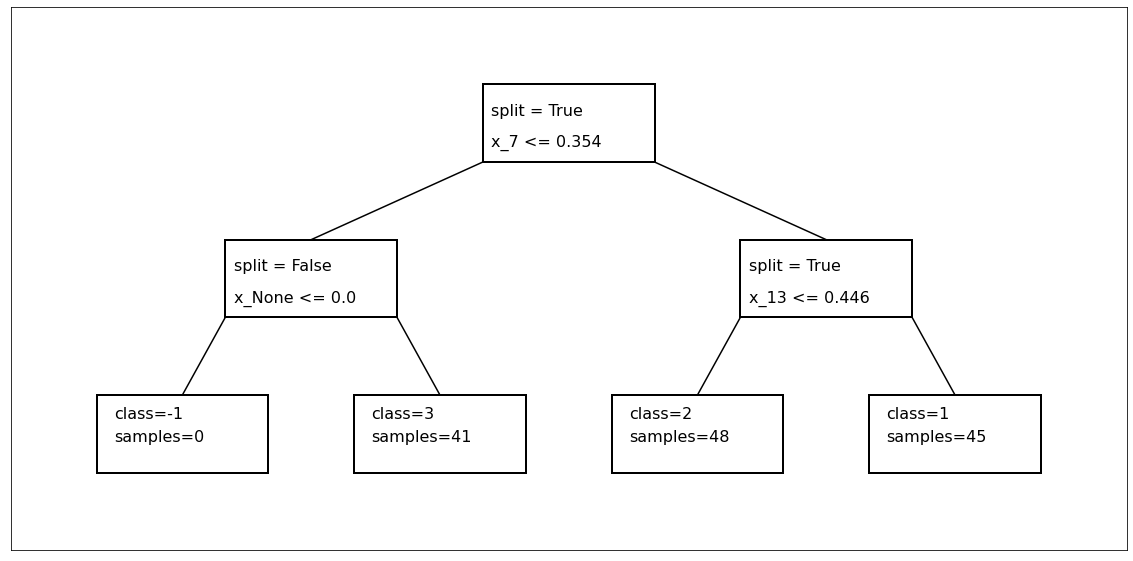

In [7]:
# plot the tree
tree_picture(OCT, 2, x_train)

In [8]:
# confusion matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_test_pred, labels=[1,2,3]), index=['true_1', 'true_2', 'true_3'], 
                           columns=['pred_1', 'pred_2', 'pred_3'])
conf_matrix

,pred_1,pred_2,pred_3
true_1,12,0,0
true_2,1,8,3
true_3,0,1,9
